In [ ]:
# Import of the Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **LIBRAIRIES AND DATASETS**
Installation and importation of the librairies and the drive images

In [ ]:
!pip install -q pillow==10.0.1 matplotlib==3.8.0 scikit-image==0.21.0 scikit-learn==1.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import os
import random
from skimage.transform import resize
import numpy as np
from skimage.io import imsave, imread,imshow
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from skimage.segmentation import slic
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
images_path = "/content/drive/MyDrive/Project_IPEO/images"
image_list = os.listdir(images_path)
sub_directories = image_list
directories = [os.path.join(images_path, subdir) for subdir in sub_directories]

# **FEATURE ENGINEERING**

## NDVI

In [ ]:
# Compute NDVI of the sentinel images
for directory in directories:
    print(directory)
    # Define the full image paths to read the Red and NIR band of each sentinel image
    band4_path = directory + "//band4.tiff" # Red
    band8_path = directory + "//band8.tiff" # Near-infrared (NIR)

    # Read images
    band4_array = imread(band4_path).astype(np.float32)
    band8_array = imread(band8_path).astype(np.float32)

    # Compute NDVI indexes
    ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)

    # Save NDVI image
    ndvi_path = directory + "/ndvi.tif".format(directory) #.format is a method to replace the placeholders with values
    imsave(ndvi_path, ndvi_array)
    print("Image saved in: " + ndvi_path)

/content/drive/Shareddrives/Project_IPEO/images/10.24


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.24/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.26


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.26/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.18


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.18/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.28
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.28/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.30


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.30/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.19
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.19/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.23


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.23/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.31


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.31/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.27


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.27/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.20
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.20/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.14


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.14/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.15


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.15/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.23


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.23/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.04


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.04/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.18
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.18/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.21
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.21/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.05


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.05/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.22


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.22/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.01


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.01/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/10.03
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.03/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.16


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.16/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.10


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.10/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.12
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.12/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.14


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.14/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.07


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.07/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.17


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.17/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.15
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.15/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.11


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.11/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.04


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.04/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.13
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.13/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.23


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.23/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.01


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.01/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.25
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.25/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.21


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.21/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.27


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.27/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.02


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.02/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.19
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.19/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/09.03


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/09.03/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.22


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.22/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.15


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.15/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.30


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.30/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.07
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.07/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.11
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.11/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.03


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.03/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.04


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.04/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.02
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.02/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.08


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.08/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.06


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.06/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.31
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.31/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/08.12


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/08.12/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.12


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.12/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.10
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.10/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.19


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.19/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.29


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.29/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.14


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.14/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.23
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.23/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.07


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.07/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.22


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.22/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.11


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.11/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.16
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.16/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.28


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.28/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.25


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.25/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.06
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.06/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.29


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.29/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.27


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.27/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.04
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.04/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.26


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.26/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.03


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.03/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/07.02


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/07.02/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.30


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.30/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.14
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.14/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.21
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.21/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.11


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.11/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.15
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.15/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.19


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.19/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.09


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.09/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.22
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.22/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.17


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.17/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.10


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.10/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.13
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.13/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.01


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.01/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.06
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.06/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.05
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.05/ndvi.tif
/content/drive/Shareddrives/Project_IPEO/images/06.03


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: /content/drive/Shareddrives/Project_IPEO/images/06.03/ndvi.tif


<ipython-input-6-7221b6a04e7c>:13: RuntimeWarning: invalid value encountered in divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


## FAI

In [ ]:
#Definintion of median wave length of the NIR, red and SWIR
lambda_nir = 842
lamda_red = 665
lamda_swir = 1610

#Compute FAI of the Sentinel images
for directory in directories:

# Define the full image paths to read the NIR, red and SWIR band of each sentinel image
  band4_path = directory + "//band4.tiff"
  band8_path = directory + "//band8.tiff"
  band11_path = directory + "//band11.tiff"

  # Read images
  band4_array = imread(band4_path).astype(np.float32)
  band8_array = imread(band8_path).astype(np.float32)
  band11_array = imread(band11_path).astype(np.float32)

  # Compute FAI indexes
  fai_array = band8_array - band4_array + (band11_array - band4_array) * ((lambda_nir-lamda_red)/(lamda_swir -lamda_red))

  # Save FAI images
  fai_path = directory + "/fai.tif".format(directory) #.format is a method to replace the placeholders with values
  imsave(fai_path, fai_array)
  print("Image saved in: " + fai_path)

Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.24/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.26/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.18/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.28/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.30/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.19/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.23/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.31/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.27/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.20/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.14/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/10.15/fai.tif
Image saved in: /content/drive/Shareddrives/Project_IPEO/images/

## Function definitions to compute the features

Definition of the function to compute the different features for a region and concatenate them



In [ ]:
#Function to convert data to the shape (num_pixels x num_bands)

def convert_to_shape_pixels_by_bands(data):
    num_dimensions = len(data.shape)
    assert(num_dimensions == 2 or num_dimensions == 3)
    if num_dimensions == 3:
        num_bands = data.shape[2]
        return data.reshape((-1, num_bands))
    else:
        return data

# Function to the average of a region
def compute_average_feature(data):
    # Convert data to the shape (num_pixels x num_bands) if needed
    data_2d = convert_to_shape_pixels_by_bands(data)
    # Get the number of bands
    num_bands = data_2d.shape[1]
    avg_features = np.zeros(num_bands)
    for b in range(num_bands):
        # Compute the average value of each band
        avg_features[b] = np.mean(data_2d[:, b])
    return avg_features

# Function to the standard deviation of a region
def compute_standard_deviation_feature(data):
    # Convert data to the shape (num_pixels x num_bands) if needed
    data_2d = convert_to_shape_pixels_by_bands(data)
    # Compute the standard deviation feature for each band
    num_bands = data_2d.shape[1]
    avg_features = np.zeros(num_bands)
    for b in range(num_bands):
        avg_features[b] = np.std(data_2d[:, b])
    return avg_features

#Function to the histogram of a region
def compute_histogram_feature(data, num_bins=10):
    # Convert data to the shape (num_pixels x num_bands) if needed
    data_2d = convert_to_shape_pixels_by_bands(data)
    num_bands = data_2d.shape[1]
    hist_features = np.zeros((num_bands, num_bins)).astype(np.float32)
    for b in range(num_bands):
        # Compute the histogram for each band
        hist, boundaries = np.histogram(data_2d[:, b], bins=num_bins)
        hist_features[b, :] = hist
    # Return a 1D array containing all the values
    return hist_features.flatten()

# Compute the mean NDVI for a region
def compute_ndvi_feature(data):
    data = np.array(data)
    return np.nanmean(data)


# Compute the mean FAI for a region
def compute_fai_feature(data):
    data = np.array(data)
    return np.nanmean(data)


# Compute the different features for a region and concatenate them
def compute_image_features_from_regions(image, ndvi, fai, segmentation_map):
    num_regions = len(np.unique(segmentation_map))
    all_features = []
    for id_region in range(num_regions):
        # Obtain pixel values of each regions, with shape (num_pixels x num_bands)
        pixel_values = image[segmentation_map==id_region]
        pixel_ndvi = ndvi[segmentation_map==id_region]
        pixel_fai = fai[segmentation_map==id_region]
        # Compute the average, standard deviation, histogram, NDIV and FAI
        #     features and concatenated them
        avg = compute_average_feature(pixel_values)
        std = compute_standard_deviation_feature(pixel_values)
        hist_features = compute_histogram_feature(pixel_values)
        ndvi_features = compute_ndvi_feature(pixel_ndvi)
        fai_features = compute_fai_feature(pixel_fai)
        if np.ndim(ndvi_features) > 0 and np.ndim(fai_features) > 0:
          features = np.concatenate([avg, std, hist_features, ndvi_features, fai_features])
        else:
          features = np.concatenate([avg, std, hist_features])
        # Add concatenated features to the variable all_features
        all_features.append(features)

    # convert list to numpy array of shape: (num_regions x num_bands)
    return np.array(all_features).astype(np.float32)

##Segmantation of the images in regions and computation of the features on each regions

In [ ]:
total_num_images = len(directories)

for directory in directories:
    # Open the images and features
    image_number = directories.index(directory)
    input_dir = directory + "//TC.tiff"
    input_dir_ndvi = directory + "//ndvi.tif"
    input_dir_fai = directory + "//fai.tif"
    image = imread(input_dir)
    ndvi = imread(input_dir_ndvi)
    fai = imread(input_dir_fai)
    # Segment the images
    segmented_image = slic(image, n_segments=1000, start_label=0)
    # Save SLIC regions
    regions_path =  "/content/drive/MyDrive/Project_IPEO/regions/regions_" + str(image_number) + ".tif"
    imsave(regions_path, segmented_image.astype(np.uint32))
    print("Regions saved in " + regions_path)
    # Compute features
    region_features = compute_image_features_from_regions(image, ndvi, fai, segmented_image)
    # Save features
    region_features_path =  "/content/drive/MyDrive/Project_IPEO/features/features_" + str(image_number) + ".npy"
    np.save(region_features_path, region_features)
    print("Features saved in " + region_features_path)

<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_0.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_0.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_0.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_1.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_1.tif
Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_1.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_2.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_2.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_2.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_3.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_3.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_3.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_4.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_4.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_4.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_5.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_5.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_5.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_6.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_6.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_6.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_7.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_7.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_7.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_8.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_8.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_8.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_9.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_9.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_9.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_10.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_10.tif
Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_10.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_11.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_11.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_11.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_12.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_12.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_12.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_13.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_13.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_13.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_14.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_14.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_14.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_15.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_15.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_15.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_16.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_16.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_16.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_17.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_17.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_17.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_18.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_18.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_18.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_19.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_19.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_19.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_20.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_20.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_20.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_21.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_21.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_21.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_22.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_22.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_22.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_23.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_23.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_23.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_24.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_24.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_24.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_25.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_25.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_25.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_26.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_26.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_26.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_27.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_27.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_27.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_28.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_28.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_28.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_29.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_29.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_29.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_30.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_30.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_30.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_31.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_31.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_31.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_32.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_32.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_32.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_33.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_33.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_33.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_34.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_34.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_34.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_35.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_35.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_35.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_36.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_36.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_36.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_37.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_37.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_37.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_38.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_38.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_38.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_39.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_39.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_39.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_40.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_40.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_40.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_41.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_41.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_41.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_42.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_42.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_42.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_43.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_43.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_43.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_44.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_44.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_44.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_45.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_45.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_45.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_46.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_46.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_46.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_47.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_47.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_47.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_48.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_48.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_48.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_49.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_49.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_49.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_50.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_50.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_50.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_51.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_51.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_51.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_52.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_52.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_52.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_53.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_53.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_53.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_54.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_54.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_54.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_55.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_55.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_55.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_56.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_56.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_56.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_57.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_57.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_57.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_58.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_58.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_58.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_59.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_59.tif
Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_59.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_60.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_60.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_60.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_61.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_61.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_61.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_62.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_62.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_62.npy


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_63.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_63.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_63.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_64.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_64.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_64.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_65.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_65.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_65.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_66.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_66.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_66.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_67.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_67.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_67.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_68.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_68.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_68.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_69.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_69.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_69.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_70.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_70.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_70.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_71.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_71.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_71.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_72.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_72.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_72.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_73.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_73.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_73.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_74.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_74.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_74.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_75.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_75.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_75.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_76.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_76.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_76.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_77.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_77.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_77.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_78.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_78.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_78.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_79.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_79.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_79.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_80.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_80.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_80.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_81.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_81.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_81.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_82.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_82.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_82.npy


<ipython-input-11-8a21492270ef>:16: UserWarning: /content/drive/Shareddrives/Project_IPEO/regions/regions_83.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in /content/drive/Shareddrives/Project_IPEO/regions/regions_83.tif


<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)
<ipython-input-10-717af21ccd4f>:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(data)


Features saved in /content/drive/Shareddrives/Project_IPEO/features/features_83.npy


# **MODEL TRAINING**

## Function to define label per region

In [ ]:
def get_label_per_region(segmented_image, label_map):
    """
    Returns a 1D numpy array that contains the label for each region, shape: (num_regions)
            For each region, we obtain the label that has the largest intersection with it
    """
    num_regions = len(np.unique(segmented_image))
    num_labels = len(np.unique(label_map))
    region_labels = []
    for region_id in range(num_regions):
        mask_region = segmented_image == region_id

        intersection_per_label = []
        for label_id in range(num_labels):
            mask_label = label_map == label_id
            # Compute intersection of each region with each label
            intersection = np.sum(mask_region * mask_label)
            intersection_per_label.append(intersection)

        intersection_per_label = np.array(intersection_per_label)
        # Obtain the index of the label with largest intersection
        selected_label = np.argmax(intersection_per_label)
        region_labels.append(selected_label)

    return np.array(region_labels).astype(np.uint32)

## Data processing

### Separation of the sets and label per regions

* Creation of the train and test set
* Attribution of the labels to regions of the Ground Truth images
* Normalisation of features

In [ ]:
# Find the number of images
total_num_images = len(directories)

# Open the path of the Ground Truth
gt_path = "/content/drive/MyDrive/Project_IPEO/gt/"
gt_list = os.listdir(gt_path)

# Definition of training and test sets:

# Define the size of the sets
train_size = int(0.7 * total_num_images)
test_size = int(0.3 * total_num_images)

# Randomly attribute the images to the trains
all_indices = list(range(total_num_images))
random.seed(10)
train_images = random.sample(all_indices, train_size)
remaining_indices = list(set(all_indices) - set(train_images))
test_images = random.sample(remaining_indices, test_size)

#### Train set


In [ ]:
# Attribution of the labels to regions of the Ground Truth images:

# Create arrays of training targets and features
all_train_region_features = []
all_train_region_labels = []

for image_number in range(len(train_images)):
    # Read the Groud Truth images
    segmented_image_path = "/content/drive/MyDrive/Project_IPEO/regions/regions_" + str(image_number) + ".tif"
    segmented_image = imread(segmented_image_path)
    gt_name = gt_list[image_number]
    gt_current_path = gt_path + f"{gt_name}"
    gt_image = imread(gt_current_path)
    # Define the label per region of the Groud Truth
    region_labels = get_label_per_region(segmented_image, gt_image)
    all_train_region_labels.append(region_labels)
    region_features_path = "/content/drive/MyDrive/Project_IPEO/features/features_" + str(image_number) + ".npy"
    region_features = np.load(region_features_path)
    # Add current region features to the variable all_train_region_features
    all_train_region_features.append(region_features)

# Tranforming the list all_train_region_labels in an array of shape: (num_all_regions)
train_labels = np.concatenate(all_train_region_labels)
print("train_labels shape " + str(train_labels.shape))
# Tranforming the list all_train_region_features in an array of shape: (num_all_regions, num_features)
train_features = np.concatenate(all_train_region_features)
print("train_features shape " + str(train_features.shape))


# Normalisation of the features
mean_per_feature = np.mean(train_features, axis=0)
std_per_feature = np.std(train_features, axis=0)
norm_train_features = (train_features - mean_per_feature) / std_per_feature


train_labels shape (43077,)
train_features shape (43077, 36)


#### Test Set

In [ ]:
# Attribution of the labels to regions of the Ground Truth images:

# Create arrays of test targets and features
all_test_region_features = []
all_test_region_labels = []

for image_number in test_images:
    # Read the Groud Truth images
    segmented_image_path = "/content/drive/MyDrive/Project_IPEO/regions/regions_" + str(image_number) + ".tif"
    segmented_image = imread(segmented_image_path)
    gt_name = gt_list[image_number]
    gt_current_path = gt_path + f"{gt_name}"
    gt_image = imread(gt_current_path)
    # Define the label per region of the Groud Truth
    region_labels = get_label_per_region(segmented_image, gt_image)
    all_test_region_labels.append(region_labels)
    region_features_path = "/content/drive/SMyDrive/Project_IPEO/features/features_" + str(image_number) + ".npy"
    region_features = np.load(region_features_path)
    all_test_region_features.append(region_features)

# Transforming the list all_test_region_labels into an array of shape: (num_all_regions)
test_labels = np.concatenate(all_test_region_labels)
print("test_labels shape " + str(test_labels.shape))
# Transforming the list all_test_region_features into an array of shape: (num_all_regions, num_features)
test_features = np.concatenate(all_test_region_features)
print("test_features shape " + str(test_features.shape))

# Normalisation of the features
mean_per_feature = np.mean(train_features, axis=0)
std_per_feature = np.std(train_features, axis=0)
norm_test_features = (test_features - mean_per_feature) / std_per_feature


test_labels shape (18602,)
test_features shape (18602, 36)


## KNN

In [ ]:
# Hyperparameter Tuning and Training with GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5],  # Typically odd numbers to avoid ties
    'weights': ['distance']}

# Initialize the classifier
knn = KNeighborsClassifier(weights='distance')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit GridSearchCV
grid_search.fit(norm_train_features, train_labels)

# Training the model using the best parameters
best_params = grid_search.best_params_
print(best_params)
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(norm_train_features, train_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'n_neighbors': 5, 'weights': 'distance'}


KNeighborsClassifier(weights='distance')

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy: 0.9284
Precision: 0.9283
Recall: 0.9284
F1 Score: 0.9278

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12197
           1       0.95      0.56      0.71       177
           2       0.91      0.89      0.90      6228

    accuracy                           0.93     18602
   macro avg       0.93      0.80      0.85     18602
weighted avg       0.93      0.93      0.93     18602



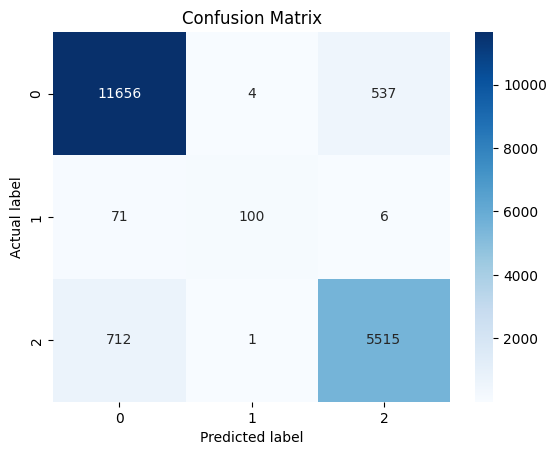

In [ ]:
evaluate_model(knn_best, norm_test_features, test_labels)

## RF

In [ ]:
# Hyperparameter Tuning and Training with GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [ 5, 10, 20, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']}

# Initialize the classifier
rf = RandomForestClassifier(random_state=10, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit GridSearchCV
grid_search.fit(norm_train_features, train_labels)

# Training the model using the best parameters
best_params = grid_search.best_params_
print(best_params)
rf_best = RandomForestClassifier(**best_params, random_state=10)
rf_best.fit(norm_train_features, train_labels)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=10)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9446
Precision: 0.9450
Recall: 0.9446
F1 Score: 0.9435

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12352
           1       0.99      0.54      0.70       232
           2       0.95      0.89      0.92      6018

    accuracy                           0.94     18602
   macro avg       0.96      0.80      0.86     18602
weighted avg       0.94      0.94      0.94     18602



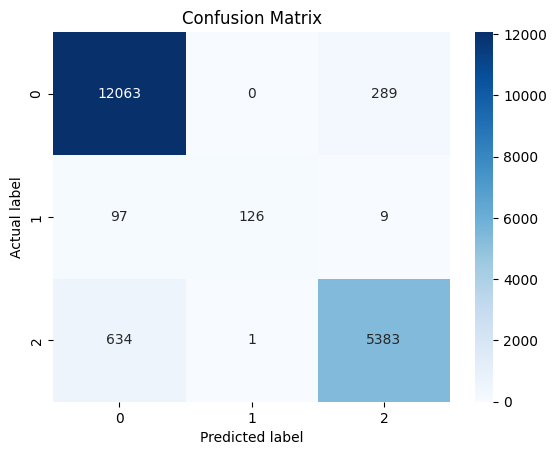

In [ ]:
print(best_params)
evaluate_model(rf_best, norm_test_features, test_labels)

## SVM

In [ ]:
# Hyperparameter Tuning and Training with GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Type of the kernel
    'class_weight': ['balanced']  # Handling class imbalance
}

# Initialize the classifier
svm = SVC(random_state=10)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit GridSearchCV
grid_search.fit(norm_train_features, train_labels)

# Training the model using the best parameters
best_params = grid_search.best_params_
print(best_params)
svm_best = SVC(**best_params, random_state=10)
svm_best.fit(norm_train_features, train_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}


SVC(C=1, class_weight='balanced', random_state=10)

{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Accuracy: 0.7041
Precision: 0.8639
Recall: 0.7041
F1 Score: 0.7720

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     11984
           1       0.03      0.87      0.06       123
           2       0.90      0.68      0.77      6495

    accuracy                           0.70     18602
   macro avg       0.59      0.75      0.54     18602
weighted avg       0.86      0.70      0.77     18602



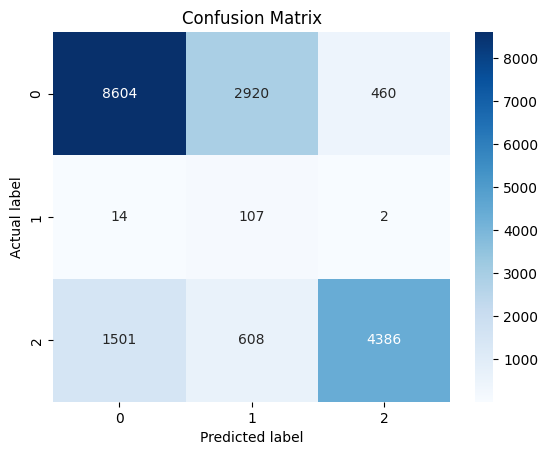

In [ ]:
print(best_params)
evaluate_model(svm_best, norm_test_features, test_labels)

# MODEL TESTING

## Definition of function

* Calculation of mertrics
* Display of confusion matrix

In [ ]:
# Definition of function to compute the metrics:
def predict_classification_maps_and_get_accuracy(classifier, image_numbers,mean_per_feature,std_per_feature,model_name, save_predictions=False):
    list_predictions = []
    list_gt_labels = []
    for image_number in image_numbers:
        # Read segmented image
        segmented_image_path = "/content/drive/MyDrive/Project_IPEO/regions/regions_" + str(image_number) + ".tif"
        segmented_image = imread(segmented_image_path)
        # Read features using the function: np.load(file_path.npy)
        region_features_path = "/content/drive/MyDrive/Project_IPEO/features/features_" + str(image_number) + ".npy"
        region_features = np.load(region_features_path)
        # Normalize features by substracting the mean and dividing by the standard deviation (of the train set)
        norm_region_features = (region_features - mean_per_feature) / std_per_feature
        # Predict label of regions
        label_predictions = classifier.predict(norm_region_features)
        # Compute label predictions per pixel
        predicion_map = np.zeros(segmented_image.shape).astype(np.uint8)
        num_regions = len(np.unique(segmented_image))
        for region_id in range(num_regions):
            # Set the label predicted for a region to all the pixels of that region
            predicion_map[segmented_image==region_id] = label_predictions[region_id]

        list_predictions.append(predicion_map.flatten())

        if save_predictions:
            # Save prediction map image
            prediction_map_path = "/content/drive/MyDrive/Project_IPEO/prediction_maps/" + "prediction_map_"+ model_name + str(image_number) + ".tif"
            imsave(prediction_map_path, predicion_map)

        # Get ground truth label
        gt_name = gt_list[image_number]
        gt_current_path = gt_path + f"{gt_name}"
        gt = imread(gt_current_path)

        list_gt_labels.append(gt.flatten())

    #Computation of metrics
    all_predictions = np.concatenate(list_predictions)
    all_gt_labels = np.concatenate(list_gt_labels)
    accuracy = accuracy_score(all_gt_labels, all_predictions)
    precision = precision_score(all_gt_labels, all_predictions, average='weighted')
    recall = recall_score(all_gt_labels, all_predictions, average='weighted')
    f1 = f1_score(all_gt_labels, all_predictions, average='weighted')

    conf_matrix = confusion_matrix(all_gt_labels, all_predictions)

    return accuracy, conf_matrix, precision, recall, f1

# Display of confusion matrix
def plot_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Ground Truth', fontsize=18)
    plt.show()

##KNN

<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_KNN_40.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_KNN_65.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_KNN_21.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_KNN_27.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_KNN_57.tif is a low contrast image
  imsave(prediction_map_path, predicion_

Accuracy: 0.8671
[[2739778    5380  234534]
 [  36023   11133    7723]
 [ 443557    1180 2001242]]
Precision: 0.8671
Recall: 0.8671
F1 Score: 0.8646


<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_KNN_14.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)


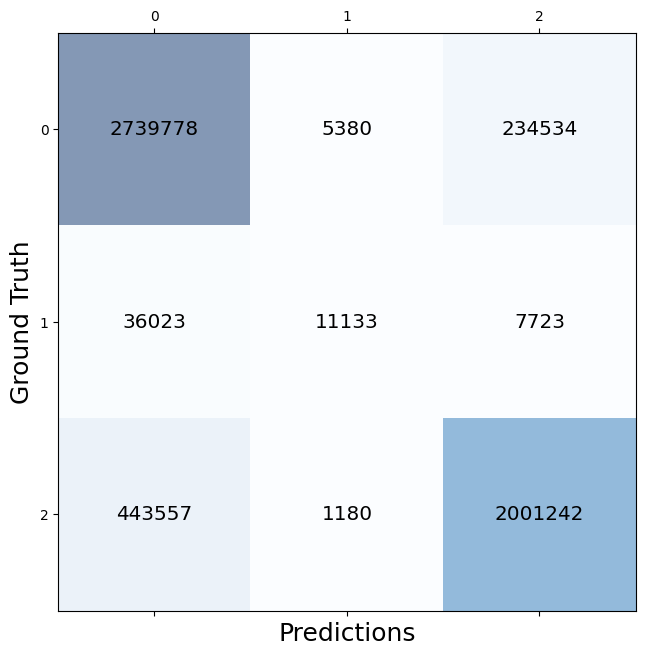

In [ ]:
#Computation of mertrics
accuracy, conf_matrix_test, precision, recall, f1 = predict_classification_maps_and_get_accuracy(knn_best, test_images, mean_per_feature, std_per_feature, 'KNN_',save_predictions=False)
print(f"Accuracy: {accuracy:.4f}")
print(conf_matrix_test)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


#Display of confusion matrix
plot_confusion_matrix(conf_matrix_test)

## RF

<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_RF_65.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_RF_21.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_RF_57.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_RF_74.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<ipython-input-19-755a3859a224>:28: UserWarning: /content/drive/Shareddrives/Project_IPEO/prediction_maps/prediction_map_RF_6.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
<

Accuracy: 0.8762
[[2798364    5219  176109]
 [  37000   11133    6746]
 [ 452367     812 1992800]]
Precision: 0.8780
Recall: 0.8762
F1 Score: 0.8735


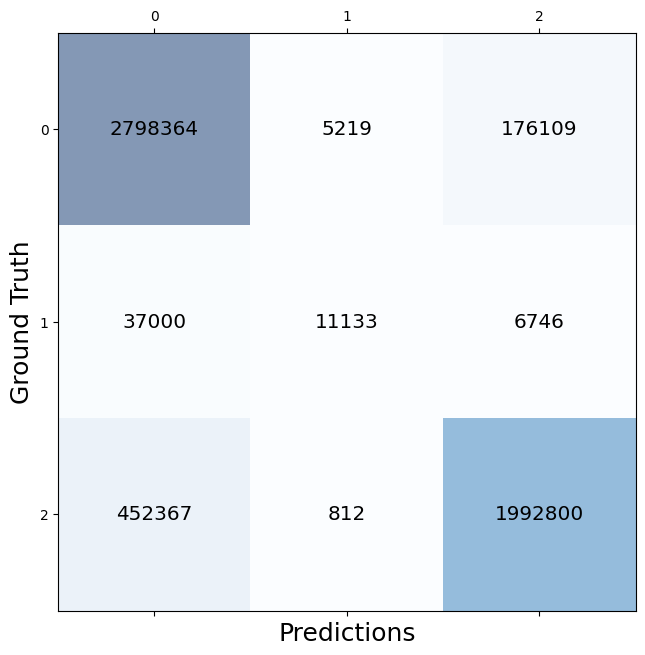

In [ ]:
#computation of mertrics
accuracy, conf_matrix_test, precision, recall, f1 = predict_classification_maps_and_get_accuracy(rf_best, test_images, mean_per_feature, std_per_feature,'RF_', save_predictions=True)
print(f"Accuracy: {accuracy:.4f}")
print(conf_matrix_test)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

#Display of confusion matrix
plot_confusion_matrix(conf_matrix_test)

## SVM

Accuracy: 0.6405
[[1820419  959930  199343]
 [  18239   29205    7435]
 [ 406833  378508 1660638]]
Precision: 0.8379
Recall: 0.6405
F1 Score: 0.7229


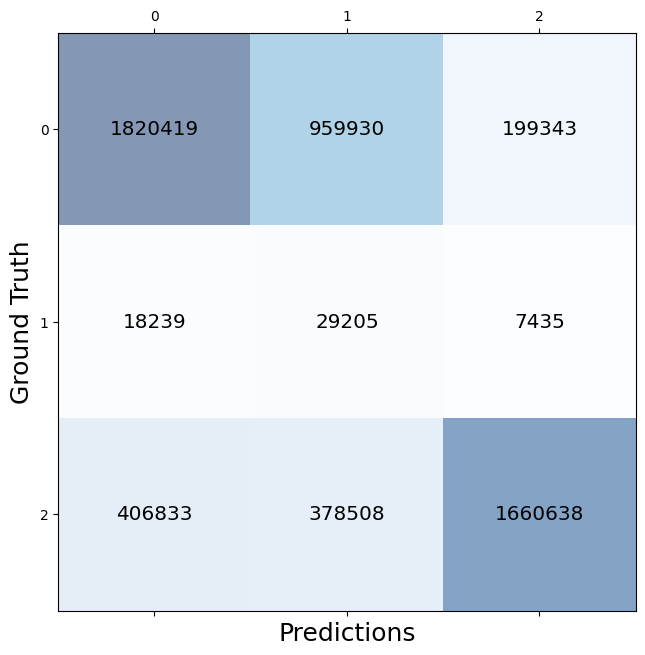

In [ ]:
#Computation of mertrics
accuracy, conf_matrix_test, precision, recall, f1 = predict_classification_maps_and_get_accuracy(svm_best, test_images, mean_per_feature, std_per_feature, 'SVM_', save_predictions=False)
print(f"Accuracy: {accuracy:.4f}")
print(conf_matrix_test)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

#Display of confusion matrix
plot_confusion_matrix(conf_matrix_test)

# PREDICTIONS VISUALISATION

In [ ]:
# Definition of function to display the predictions
def display_label_image(label_map,Title):
    colors = np.array([[0, 255, 255], # Sea: cyan
                       [255, 0, 0],   # Algea: red
                       [0, 0, 0]])    # Land/cloud: black
    colors = colors.astype(np.uint8)
    color_map = np.zeros((label_map.shape[0], label_map.shape[1], 3)).astype(np.uint8)
    for label_id in range(colors.shape[0]):
        color_map[label_map == label_id] = colors[label_id, :]
    plt.figure(figsize = (11,11))
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.title(Title)
    patches = [mpatches.Patch(color='cyan', label="Sea"),mpatches.Patch(color='red',label="Algae"), mpatches.Patch(color='black',label="Land/cloud" )]
    plt.legend(handles=patches, loc='upper right', borderaxespad=1, )
    plt.imshow(color_map)


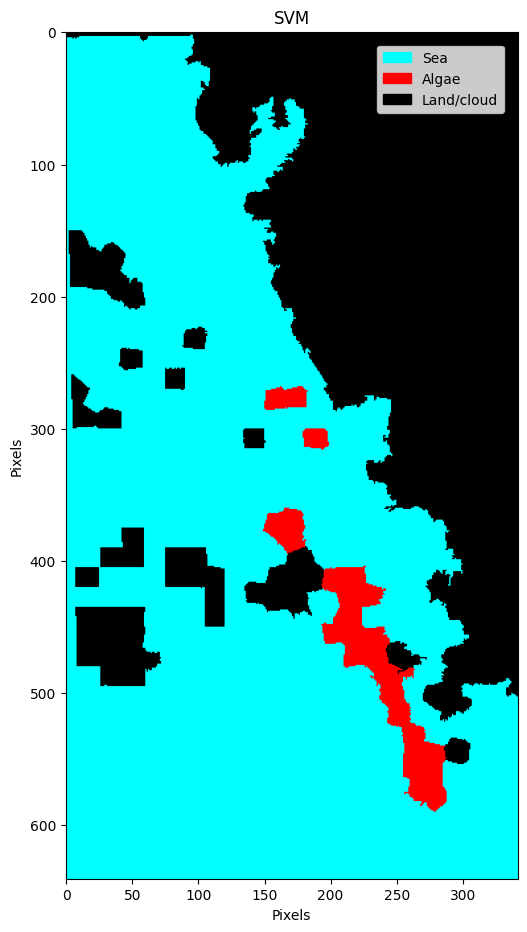

In [ ]:
#prediction visualisation
example_prediction_path = "/content/drive/MyDrive/Project_IPEO/prediction_maps/prediction_map_RF_25.tif"

example_prediction = imread(example_prediction_path)
display_label_image(example_prediction,'SVM')
